In [38]:
import pandas as pd
import numpy as np 
import seaborn as sns
 

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics



In [19]:
df = pd.read_csv('C:\\Users\\Raju\\data set\\breastcancer.csv')
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [20]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [21]:
df = df.drop(['Unnamed: 32','id'],axis = 1)


In [23]:
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)


C:\Users\Raju\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0    357
1    212
Name: diagnosis, dtype: int64


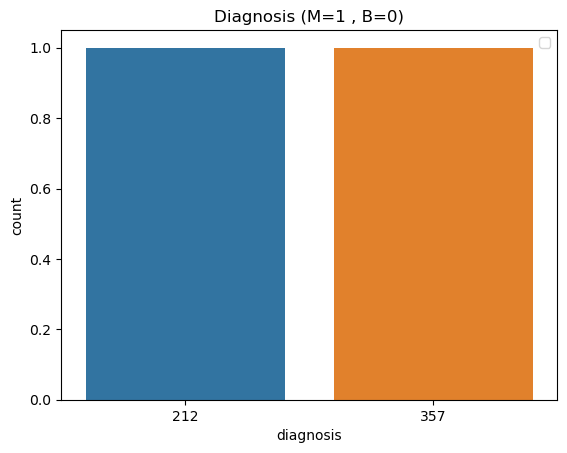

In [55]:
a = df.diagnosis.value_counts()
print(a)
sns.countplot(a)
plt.title('Diagnosis (M=1 , B=0)')
plt.legend()
plt.show()

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [32]:
print( len(df.columns))

31


In [41]:
traindf, testdf = train_test_split(df, test_size = 0.3)


In [67]:
from sklearn.model_selection import cross_val_score

def classification_model(model, data, predictors, outcome):
    
    model.fit(data[predictors], data[outcome])
    
    predictions = model.predict(data[predictors])
    
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy: {:.3%}".format(accuracy))
    
    cv_scores = cross_val_score(model, data[predictors], data[outcome], cv=5)
    mean_cv_score = np.mean(cv_scores)
    print("Cross-Validation Score: {:.3%}".format(mean_cv_score))
    
classification_model()
    
  


TypeError: classification_model() missing 4 required positional arguments: 'model', 'data', 'predictors', and 'outcome'